## Machine Learning Stock Predictions using Logistic Regressing, KNearest Neighbors, Decision Trees, MLP, and SVC

In [505]:
#import Libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 

In [506]:
data = pd.read_csv("Stocks/msft.us.txt")
data = data.drop(columns=['OpenInt', 'Date'])
data

,Open,High,Low,Close,Volume
0,0.06720,0.07533,0.06720,0.07533,1371330506
1,0.07533,0.07533,0.07533,0.07533,409569463
2,0.07533,0.07533,0.07533,0.07533,176995245
3,0.07533,0.07533,0.07533,0.07533,90067008
4,0.07533,0.07533,0.07533,0.07533,63655515
...,...,...,...,...,...
7978,84.20000,84.70000,84.08250,84.47000,19852151
7979,84.77000,84.90000,83.93000,84.26000,17927878
7980,84.14000,84.61000,83.83000,84.56000,18029584
7981,84.11000,84.27000,82.90000,84.09000,21175384


In [507]:
#fearures and X, y
features = ['High', 'Low', 'Close']

X = data.loc[:, features].values
y = data.loc[:, ['Open']].values

y = y.astype('int64')

In [508]:
#Random Forest to find importance of features
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

features2 = features
importances = model.feature_importances_
indicies = np.argsort(importances)

c:\Program Files\Python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


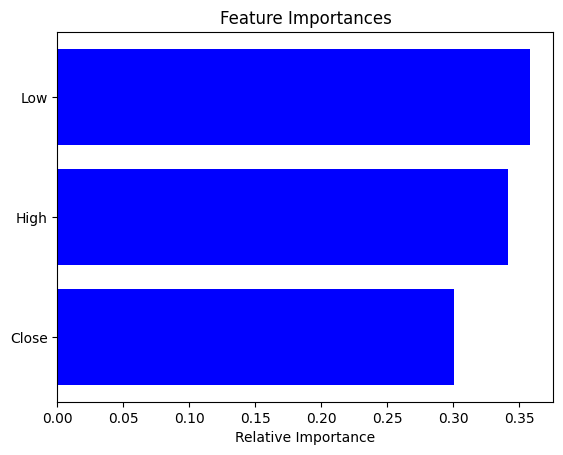

In [509]:
#plot the importances
plt.title('Feature Importances')
plt.barh(range(len(indicies)), importances[indicies], color='b', align='center')
plt.yticks(range(len(indicies)), [features[i] for i in indicies])
plt.xlabel('Relative Importance')
plt.show()

* From the chart above, we found that Volume was not important when it came to relevance, so we eliminated it from the features list that we input into the models.
* High, Low, and Close will stay in the features list, as we find them to all be of similar importance for the models.
* Random Forest, in this case, would be a good model to use to graph importance, since it searches for the best features that would return the best results. Here we are asking it to graph all features in the list by their importance, and we find that Volume isn't as important as the other three, which must've showed up more in the results the classifier produced.

In [510]:
#Train/Test Split for Regression Model
from sklearn.model_selection import train_test_split
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

(7983, 3) (7983, 1)


In [511]:
#Training and scoring Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LogisticRegression()

#Regression model
model.fit(X_train, y_train.ravel())
Y_pred = model.predict(X_test)
Y_pred = Y_pred.astype('int64')

#score this model
log_acc = model.score(X_test, y_test)

#print score
print("Log Regression Accuracy: " + str(log_acc))
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, Y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, Y_pred))

Log Regression Accuracy: 0.3135699373695198
Mean Squared Error: 103.65
Coefficient of determination (R^2): 0.62


c:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [512]:
from sklearn.linear_model import LinearRegression

linModel = LinearRegression()

#Regression model
linModel.fit(X_train, y_train.ravel())
lin_pred = linModel.predict(X_test)
lin_pred = lin_pred.astype('int64')

#score this model
lin_acc = linModel.score(X_test, y_test)

#print score
print("Linear Regression Accuracy: " + str(lin_acc))
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, lin_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, lin_pred))

Linear Regression Accuracy: 0.9995676518320117
Mean Squared Error: 0.42
Coefficient of determination (R^2): 1.00


In [513]:
#Training and scoring KNeighbors Model
from sklearn.neighbors import KNeighborsClassifier
kNearModel = KNeighborsClassifier()

#Kneighbor model
kNearModel.fit(X_train, y_train.ravel())
kNear_pred = kNearModel.predict(X_test)
kNear_pred = kNear_pred.astype('int64')

#NearModel score
kNear_acc = kNearModel.score(X_test, y_test)

#print score
print("K-Nearest-Neighbors Accuracy: " + str(kNear_acc))
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, kNear_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, kNear_pred))



K-Nearest-Neighbors Accuracy: 0.8847599164926931
Mean Squared Error: 0.12
Coefficient of determination (R^2): 1.00


In [514]:
#Training and scoring Decision Tree model
from sklearn.tree import DecisionTreeClassifier
desTreeModel = DecisionTreeClassifier()

#desTree model
desTreeModel.fit(X_train, y_train.ravel())
desTree_pred = desTreeModel.predict(X_test)
desTree_pred = desTree_pred.astype('int64')

#desTree score
desTree_acc = desTreeModel.score(X_test, y_test)

#print score
print("Decision Tree Accuracy: " + str(desTree_acc))
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, desTree_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, desTree_pred))

Decision Tree Accuracy: 0.8492693110647181
Mean Squared Error: 0.16
Coefficient of determination (R^2): 1.00


In [515]:
#Training and scoring MLP ClassifierS
from sklearn.neural_network import MLPClassifier
mlpModel = MLPClassifier()

#mlp Model
mlpModel.fit(X_train, y_train.ravel())
mlp_pred = mlpModel.predict(X_test)
mlp_pred = mlp_pred.astype('int64')

#mlp model score
mlp_acc = mlpModel.score(X_test, y_test)

#print score
print("Neural Network Accuracy: " + str(mlp_acc))
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, mlp_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, mlp_pred))

Neural Network Accuracy: 0.5670146137787057
Mean Squared Error: 2.17
Coefficient of determination (R^2): 0.99


c:\Program Files\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [516]:
#Training and scoring SVC model
from sklearn.svm import SVC
svcModel = SVC()

#svc model
svcModel.fit(X_train, y_train.ravel())
svc_pred = svcModel.predict(X_test)
svc_pred = svc_pred.astype('int64')

#svc model score
svc_acc = svcModel.score(X_test, y_test)

#print score
print("Support Vector Accuracy: " + str(svc_acc))
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, svc_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, svc_pred))

Support Vector Accuracy: 0.6551148225469728
Mean Squared Error: 0.58
Coefficient of determination (R^2): 1.00


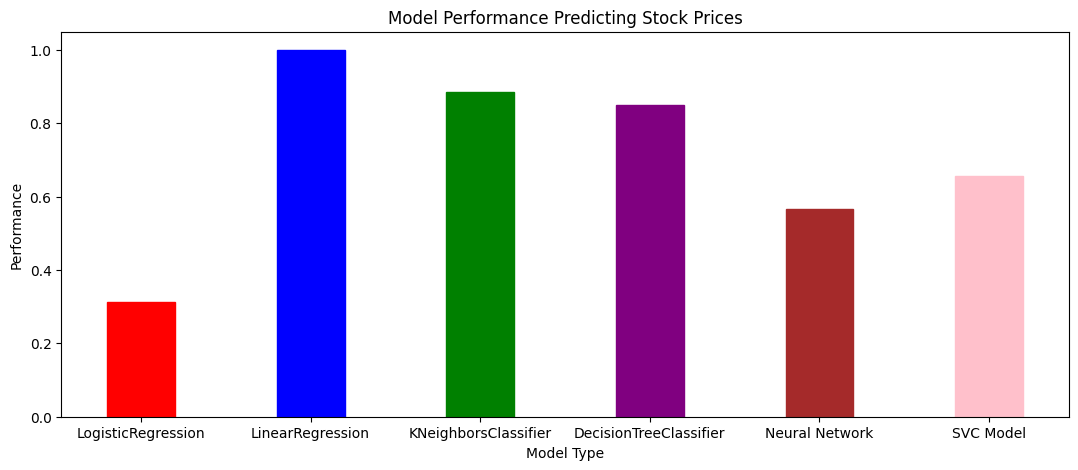

In [517]:
#Create a bar graph showing the difference between the model performances
fig = plt.figure(figsize = (13, 5))
# creating the bar plot
bars = plt.bar(['LogisticRegression', 'LinearRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'Neural Network', "SVC Model"], [log_acc, lin_acc, kNear_acc, desTree_acc, mlp_acc, svc_acc], 
        width = 0.4)
plt.xlabel("Model Type")
plt.ylabel("Performance")
plt.title("Model Performance Predicting Stock Prices")
bars[0].set_color('red')
bars[1].set_color('blue')
bars[2].set_color('green')
bars[3].set_color('purple')
bars[4].set_color('brown')
bars[5].set_color('pink')
plt.show()

## Conclusions

1. There are different results for different stocks. When it comes to $AAPL and $MSFT, we find that the models do better. This could be do to less volatility in their prices listed in the data sets. When we choose a stock like $AMZN for instance, we find that the models don't fare as well, again, possibly due to volatility and unpredictiveness in the stock price.

2. Linear Regression trumps all other models in this use case. We find that no matter what stock you pass in into the program, it is always predicting with 0.98 accuracy or better. It was consistent in all cases I have tested with it. This would be due to the linear-like path stocks tend to take as time goes on. You can look at all stock charts and see this visually. The consistency of the stock prices helps with this, as we find that it is a gradual climb or fall for many stocks.

3. The worst performing model would be logistic regression. Even though it is strong in other use cases, here, it is not. Again, looking at stock charts, we find that they take more of a linear path, not a logistic one. In the future when more data is available and if the market seems to plateau, showing a logistic path, then we may find this one working in the future, but not at this time.

4. KNeighbors, Decision Trees, Neural Networks, and SVC models all seem to perform based on what stock is being passed into the program. If it is a stock that is not a volatile, or doesn't change in price drastically, then we find that the models tend to perform decently, sitting in the 0.88-0.61 range. However, when we find a stock that would be considered to be more volatile or more drastic in its price changes, we find that the models don't perform as well, somestimes even sitting below 0.10. AAPL Charts and MSFT Charts show the models performing well, and the FB and AMZN charts show the model performing poorly.

5. If given more data, especially with the recent boom in AI, I think we would find the models performing differently. This historical data is updated only to 2017, so more recent data and recent trends would make the models produce different results. For instance, one company who has felt the effects of the AI boom for the better would be $NVDA. Here, the highest their price had got to was 213.08. Now, the stock is over 1,000. The models currently do not take in news and other data of that kind, meaning they wouldn't know an AI boom has happened. This would affect the accuracy of the models and their predictions would be off, making their scores lower.


##### **Disclaimer**: As mentioned in the conclusions, this historical data ranges all the way up to 2017. Past 2017 is not in this dataset, but could be added later and tested to find different results.